# separate images and masks from the datasets

In [3]:
import os
import shutil

# Define the source directories
train_dir = "C:\\Users\\PMLS\\OneDrive\\Desktop\\Deforestation Detection.v2i.png-mask-semantic\\train"
valid_dir = "C:\\Users\\PMLS\\OneDrive\\Desktop\\Deforestation Detection.v2i.png-mask-semantic\\valid"
test_dir = "C:\\Users\\PMLS\\OneDrive\\Desktop\\Deforestation Detection.v2i.png-mask-semantic\\test"

# Define the destination directories
destination_images_dir = "C:\\Users\\PMLS\\OneDrive\\Desktop\\Deforestation Detection\\images"
destination_masks_dir = "C:\\Users\\PMLS\\OneDrive\\Desktop\\Deforestation Detection\\masks"

# Create destination directories if they don't exist
os.makedirs(destination_images_dir, exist_ok=True)
os.makedirs(destination_masks_dir, exist_ok=True)

# Function to copy images and masks from a directory
def copy_images_and_masks(source_dir, dest_images, dest_masks):
    for filename in os.listdir(source_dir):
        if filename.endswith('.jpg'):
            # Copy images
            shutil.copy(os.path.join(source_dir, filename), dest_images)
        elif filename.endswith('.png'):
            # Copy masks
            shutil.copy(os.path.join(source_dir, filename), dest_masks)

# Copy from train, valid, and test directories
copy_images_and_masks(train_dir, destination_images_dir, destination_masks_dir)
copy_images_and_masks(valid_dir, destination_images_dir, destination_masks_dir)
copy_images_and_masks(test_dir, destination_images_dir, destination_masks_dir)

print("Images and masks have been copied successfully!")


Images and masks have been copied successfully!


# CNN model for binary segmentation

# import libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Reshape, UpSampling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Paths for the image and mask datasets
image_dir = "D:\\dataset 2\\images"
mask_dir = "D:\\dataset 2\\binary_masks"

# create function for preproces images and masks

In [ ]:
def load_images_and_masks(image_dir, mask_dir, target_size=(224, 224)):
    images = []
    masks = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, filename)
            
            img = load_img(img_path, target_size=target_size, color_mode='rgb')
            img_array = img_to_array(img) / 255.0
            
            mask = load_img(mask_path, target_size=target_size, color_mode='grayscale')
            mask_array = img_to_array(mask) / 255.0
            
            images.append(img_array)
            masks.append(mask_array)
    
    return np.array(images), np.array(masks)

# split the dataset

In [ ]:
X, y = load_images_and_masks(image_dir, mask_dir)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# create model

In [ ]:
def create_improved_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        
        UpSampling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        UpSampling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        UpSampling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        UpSampling2D((2, 2)),
        Conv2D(1, (1, 1), activation='sigmoid')  # Output layer for binary mask
    ])
    return model


# Compile the model

In [ ]:
input_shape = (224, 224, 3)
model = create_improved_cnn_model(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [7]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  
    batch_size=16
)

# show the vld_loss and accuracy
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7116 - loss: 0.6863 - val_accuracy: 0.3179 - val_loss: 3.2632
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9170 - loss: 0.2879 - val_accuracy: 0.3331 - val_loss: 2.2114
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9088 - loss: 0.2780 - val_accuracy: 0.2727 - val_loss: 5.1367
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9168 - loss: 0.2803 - val_accuracy: 0.8644 - val_loss: 0.4031
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9227 - loss: 0.2399 - val_accuracy: 0.8532 - val_loss: 0.4056
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9261 - loss: 0.2288 - val_accuracy: 0.7711 - val_loss: 0.5087
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9158 - loss: 0.2368 - val_accuracy: 0.7676 - val_loss: 0.4977
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9134 - loss: 0.2287 - val_accuracy: 0.8293 - val_loss:

# single image testing 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


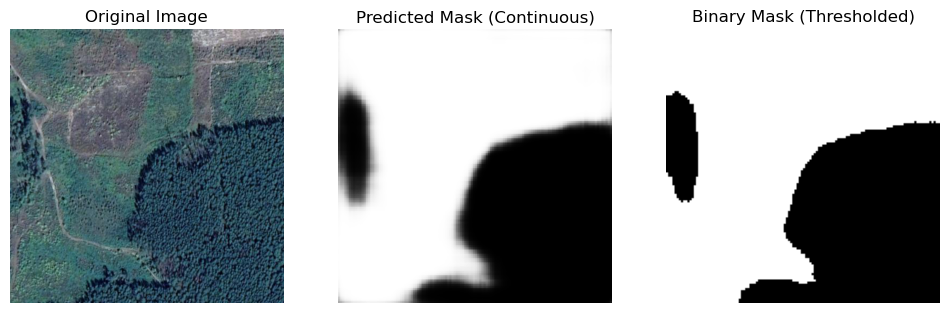

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths for the test image and the saved model
test_image_path = r"D:\dataset 2\images\1.png"
model_path = r"D:\dataset 2\VGG16_with_full fine tuning\VGG16_with_full fine tuning.h5"

# Load the above model
model = tf.keras.models.load_model(model_path)

# preprocess and load a single test image
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size, color_mode='rgb')
# Normalize to [0, 1]
    img_array = img_to_array(img) / 255.0 
    return np.expand_dims(img_array, axis=0)

# Load and preprocess the test image
test_image = load_and_preprocess_image(test_image_path)

# Predict the mask for the test image
predicted_mask = model.predict(test_image)[0]  # Remove batch dimension

#the output to get a binary mask
binary_mask = (predicted_mask > 0.5).astype(np.uint8)

# Display the original image, predicted mask, and binary mask
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(load_img(test_image_path))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask (Continuous)")
plt.imshow(predicted_mask, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Binary Mask (Thresholded)")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")

plt.show()


# simple VGG16 MOdel for segmentation

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, concatenate, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Paths for the image and mask datasets
image_dir = "D:\\dataset 2\\images"
mask_dir = "D:\\dataset 2\\binary_masks"

# preprocess images and masks

In [ ]:
def load_images_and_masks(image_dir, mask_dir, target_size=(128, 128)):
    images = []
    masks = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, filename)
            
            img = load_img(img_path, target_size=target_size, color_mode='rgb')
            img_array = img_to_array(img) / 255.0
            
            mask = load_img(mask_path, target_size=target_size, color_mode='grayscale')
            mask_array = img_to_array(mask) / 255.0
            
            images.append(img_array)
            masks.append(mask_array)
    
    return np.array(images), np.array(masks)

# split the dataset

In [ ]:
X, y = load_images_and_masks(image_dir, mask_dir)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# VGG16 model for transfer learning

In [ ]:
def create_vgg16_unet(input_shape=(128, 128, 3)):
    # Load VGG16 without top layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the layers in the base model to retain pre-trained weights
    for layer in base_model.layers:
        layer.trainable = False

    # Encoder (VGG16 as feature extractor)
    encoder_output = base_model.get_layer("block5_conv3").output
    
    # Decoder with upsampling layers to match the input size
    up1 = UpSampling2D((2, 2))(encoder_output)
    conv1 = Conv2D(512, (3, 3), activation='relu', padding='same')(up1)
    
    up2 = UpSampling2D((2, 2))(conv1)
    conv2 = Conv2D(256, (3, 3), activation='relu', padding='same')(up2)
    
    up3 = UpSampling2D((2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(up3)
    
    up4 = UpSampling2D((2, 2))(conv3)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up4)
    
    # Final convolutional layer to output a binary mask
    output = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(conv4)
    
    # Create the final model
    model = Model(inputs=base_model.input, outputs=output)
    return model


# compile & train the model

In [9]:
input_shape = (128, 128, 3)
model = create_vgg16_unet(input_shape)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=8,
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.7665 - loss: 0.5596 - val_accuracy: 0.7855 - val_loss: 0.4514
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.8318 - loss: 0.3656 - val_accuracy: 0.8138 - val_loss: 0.3747
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.8436 - loss: 0.3232 - val_accuracy: 0.8436 - val_loss: 0.3282
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.8650 - loss: 0.3019 - val_accuracy: 0.8563 - val_loss: 0.3185
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.8741 - loss: 0.2815 - val_accuracy: 0.8596 - val_loss: 0.3124
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.8757 - loss: 0.2764 - val_accuracy: 0.8171 - val_loss: 0.3959
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.8308 - loss: 0.3779 - val_accuracy: 0.8423 - val_loss: 0.3618
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.8628 - loss: 0.3022 - val_accuracy: 0.8606 - val_lo

# fine tuning with last 4 parameter vgg16 model for segmentation

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Paths for the image and mask datasets
image_dir = "D:\\dataset 2\\images"
mask_dir = "D:\\dataset 2\\binary_masks"

# preprocess images and masks

In [ ]:
def load_images_and_masks(image_dir, mask_dir, target_size=(128, 128)):
    images = []
    masks = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, filename)
            
            img = load_img(img_path, target_size=target_size, color_mode='rgb')
            img_array = img_to_array(img) / 255.0
            
            mask = load_img(mask_path, target_size=target_size, color_mode='grayscale')
            mask_array = img_to_array(mask) / 255.0
            
            images.append(img_array)
            masks.append(mask_array)
    
    return np.array(images), np.array(masks)

# split the dataset into train and test

In [ ]:
X, y = load_images_and_masks(image_dir, mask_dir)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# VGG16-based U-Net model with fine-tuning

In [ ]:
def create_vgg16_unet_finetuned(input_shape=(128, 128, 3)):
    # Load VGG16 without top layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Unfreeze the last convolutional blocks for fine-tuning
    for layer in base_model.layers:
        layer.trainable = False  # Freeze all layers first
    for layer in base_model.layers[-4:]:  # Unfreeze last 4 layers
        layer.trainable = True

    # Encoder (VGG16 as feature extractor)
    encoder_output = base_model.get_layer("block5_conv3").output
    
    # Decoder with upsampling layers
    up1 = UpSampling2D((2, 2))(encoder_output)
    conv1 = Conv2D(512, (3, 3), activation='relu', padding='same')(up1)
    
    up2 = UpSampling2D((2, 2))(conv1)
    conv2 = Conv2D(256, (3, 3), activation='relu', padding='same')(up2)
    
    up3 = UpSampling2D((2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(up3)
    
    up4 = UpSampling2D((2, 2))(conv3)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up4)
    
    # Final convolutional layer for binary mask output
    output = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(conv4)
    
    # Create the final model
    model = Model(inputs=base_model.input, outputs=output)
    return model

# compile the fine-tuned model

In [ ]:
input_shape = (128, 128, 3)
model = create_vgg16_unet_finetuned(input_shape)
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with fine-tuning and Evaluate the model

In [1]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=8,
    verbose=1
)
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.6338 - loss: 0.6254 - val_accuracy: 0.7561 - val_loss: 0.4932
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.8211 - loss: 0.3888 - val_accuracy: 0.8200 - val_loss: 0.3727
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.8578 - loss: 0.3100 - val_accuracy: 0.8418 - val_loss: 0.3387
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.8658 - loss: 0.3036 - val_accuracy: 0.8754 - val_loss: 0.2773
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.8933 - loss: 0.2534 - val_accuracy: 0.8782 - val_loss: 0.2716
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.9104 - loss: 0.2148 - val_accuracy: 0.8900 - val_loss: 0.2511
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 217s 5s/step - accuracy: 0.9101 - loss: 0.2214 - val_accuracy: 0.8906 - val_loss: 0.2497
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.9171 - loss: 0.2030 - val_accuracy: 0.8991 - v

# fine tuning with full parameter for segmentation

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Paths for the image and mask datasets
image_dir = "D:\\dataset 2\\images"
mask_dir = "D:\\dataset 2\\binary_masks"

# Load and preprocess both images and masks 

In [ ]:
def load_images_and_masks(image_dir, mask_dir, target_size=(128, 128)):
    images = []
    masks = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, filename)
            
            img = load_img(img_path, target_size=target_size, color_mode='rgb')
            img_array = img_to_array(img) / 255.0
            
            mask = load_img(mask_path, target_size=target_size, color_mode='grayscale')
            mask_array = img_to_array(mask) / 255.0
            
            images.append(img_array)
            masks.append(mask_array)
    
    return np.array(images), np.array(masks)

# split the dataset into tain and test

In [ ]:
X, y = load_images_and_masks(image_dir, mask_dir)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# VGG16-based U-Net model with fine-tuning

In [ ]:
def create_vgg16_unet_finetuned(input_shape=(128, 128, 3)):
    # Load VGG16 without top layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Unfreeze the last convolutional blocks for fine-tuning
    for layer in base_model.layers:
        layer.trainable = True  # Freeze all layers first
    for layer in base_model.layers[-4:]:  # Unfreeze last 4 layers
        layer.trainable = True

    # Encoder (VGG16 as feature extractor)
    encoder_output = base_model.get_layer("block5_conv3").output
    
    # Decoder with upsampling layers
    up1 = UpSampling2D((2, 2))(encoder_output)
    conv1 = Conv2D(512, (3, 3), activation='relu', padding='same')(up1)
    
    up2 = UpSampling2D((2, 2))(conv1)
    conv2 = Conv2D(256, (3, 3), activation='relu', padding='same')(up2)
    
    up3 = UpSampling2D((2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(up3)
    
    up4 = UpSampling2D((2, 2))(conv3)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up4)
    
    # convolutional layer for binary mask output
    output = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(conv4)
    
    #output layer
    model = Model(inputs=base_model.input, outputs=output)
    return model


# compile the fine-tuned model

In [ ]:
input_shape = (128, 128, 3)
model = create_vgg16_unet_finetuned(input_shape)
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [1]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=8,
    verbose=1
)

# show the vld_loss and accuracy the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 177s 5s/step - accuracy: 0.7369 - loss: 0.5583 - val_accuracy: 0.7990 - val_loss: 0.3606
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.8719 - loss: 0.2913 - val_accuracy: 0.9064 - val_loss: 0.2299
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.8980 - loss: 0.2434 - val_accuracy: 0.9210 - val_loss: 0.1945
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.9186 - loss: 0.1933 - val_accuracy: 0.9144 - val_loss: 0.2040
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.9274 - loss: 0.1838 - val_accuracy: 0.9251 - val_loss: 0.1819
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.9373 - loss: 0.1561 - val_accuracy: 0.9286 - val_loss: 0.1710
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.9398 - loss: 0.1504 - val_accuracy: 0.9302 - val_loss: 0.1678
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.9412 - loss: 0.1453 - val_accuracy: 0.9280 - v

In [4]:
model.save("D:\dataset 2\VGG16_with_full fine tuning\VGG16_with_full fine tuning.h5")

# VGG16-based binary classification model with Unfreeze the last 4 layers fine-tuning

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths for the image dataset
image_dir = "D:\\dataset 2\\images"  # Images directory
mask_dir = "D:\\dataset 2\\binary_masks"  # Binary masks for labels


# preprocess images and generate binary labels based on masks

In [ ]:
def load_images_and_labels(image_dir, mask_dir, target_size=(224, 224)):
    images = []
    labels = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, filename)
            
            # Load and preprocess image
            img = load_img(img_path, target_size=target_size, color_mode='rgb')
            img_array = img_to_array(img) / 255.0
            
            # Load corresponding mask and determine if deforested or forest
            mask = load_img(mask_path, target_size=target_size, color_mode='grayscale')
            mask_array = img_to_array(mask)
            label = 1 if np.any(mask_array > 0) else 0  # 1 for deforested, 0 for forest
            
            images.append(img_array)
            labels.append(label)
    
    return np.array(images), np.array(labels)


# split the dataset into test and train

In [ ]:
X, y = load_images_and_labels(image_dir, mask_dir)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# VGG16-based binary classification model with fine-tuning

In [ ]:
def create_vgg16_classifier(input_shape=(224, 224, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Unfreeze last few layers for fine-tuning
    for layer in base_model.layers:
        layer.trainable = False  # Freeze all layers first
    for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
        layer.trainable = True
    
    # Add classification layers
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification
    
    # Create the final model
    model = Model(inputs=base_model.input, outputs=output)
    return model


# compile the model

In [ ]:
input_shape = (224, 224, 3)
model = create_vgg16_classifier(input_shape)
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])


# Train and Evaluate the model

In [6]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=16,
    verbose=1
)
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.5726 - loss: 0.7963 - val_accuracy: 0.8308 - val_loss: 0.4364
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.8343 - loss: 0.4477 - val_accuracy: 0.8308 - val_loss: 0.4378
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.8089 - loss: 0.4378 - val_accuracy: 0.8308 - val_loss: 0.4009
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.8494 - loss: 0.3762 - val_accuracy: 0.8308 - val_loss: 0.3649
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.8568 - loss: 0.3492 - val_accuracy: 0.8308 - val_loss: 0.3466
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 97s 6s/step - accuracy: 0.8449 - loss: 0.3464 - val_accuracy: 0.8462 - val_loss: 0.3105
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 93s 6s/step - accuracy: 0.8719 - loss: 0.2777 - val_accuracy: 0.8615 - val_loss: 0.2841
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.9163 - loss: 0.2280 - val_accuracy: 0.8615 - val_loss:

# vgg16 model for classification fine tunning with full parameter

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Paths for the image dataset
image_dir = "D:\\dataset 2\\images"  # Images directory
mask_dir = "D:\\dataset 2\\binary_masks"  # Binary masks for labels

# preprocess images and generate binary labels based on masks

In [ ]:
def load_images_and_labels(image_dir, mask_dir, target_size=(224, 224)):
    images = []
    labels = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, filename)
            
            # Load and preprocess image
            img = load_img(img_path, target_size=target_size, color_mode='rgb')
            img_array = img_to_array(img) / 255.0
            
            # Load corresponding mask and determine if deforested or forest
            mask = load_img(mask_path, target_size=target_size, color_mode='grayscale')
            mask_array = img_to_array(mask)
            label = 1 if np.any(mask_array > 0) else 0  # 1 for deforested, 0 for forest
            
            images.append(img_array)
            labels.append(label)
    
    return np.array(images), np.array(labels)


# plit the dataset in training and testing

In [ ]:
# Load dataset
X, y = load_images_and_labels(image_dir, mask_dir)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# VGG16-based model with fine-tuning for binary classification 

In [ ]:
def create_vgg16_classifier(input_shape=(224, 224, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Unfreeze last few layers for fine-tuning
    for layer in base_model.layers:
        layer.trainable = True  # Unfreeze all layers first
    for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
        layer.trainable = True
    
    # Add classification layers
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification
    
    # Create the final model
    model = Model(inputs=base_model.input, outputs=output)
    return model


# compile the model

In [ ]:
input_shape = (224, 224, 3)
model = create_vgg16_classifier(input_shape)
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [2]:

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")



//////////////////////////////////////////////////////////
# Function to predict deforestation percentage in an image
def predict_deforestation_percentage(image_path, model, target_size=(224, 224)):
    # Load and preprocess the input image
    img = load_img(image_path, target_size=target_size, color_mode='rgb')
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the deforestation probability
    prediction = model.predict(img_array)[0]
    
    # Assuming the prediction is the deforestation probability (0 to 1)
    deforestation_percentage = prediction * 100  # Percentage of deforestation
    
    return deforestation_percentage




Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 194s 11s/step - accuracy: 0.5526 - loss: 0.7161 - val_accuracy: 0.8308 - val_loss: 0.5200
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 201s 12s/step - accuracy: 0.8314 - loss: 0.4697 - val_accuracy: 0.8308 - val_loss: 0.3514
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 196s 12s/step - accuracy: 0.8424 - loss: 0.3239 - val_accuracy: 0.8615 - val_loss: 0.3161
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 246s 15s/step - accuracy: 0.8652 - loss: 0.2800 - val_accuracy: 0.8615 - val_loss: 0.2912
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 255s 15s/step - accuracy: 0.8856 - loss: 0.2548 - val_accuracy: 0.8308 - val_loss: 0.2306
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 253s 15s/step - accuracy: 0.9220 - loss: 0.2125 - val_accuracy: 0.8615 - val_loss: 0.2099
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 263s 15s/step - accuracy: 0.9064 - loss: 0.1813 - val_accuracy: 0.8615 - val_loss: 0.2510
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 262s 15s/step - accuracy: 0.9237 - loss: 0.2057 - val_accuracy: 0.

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\dataset 2\\images\\example_image.png'

In [12]:
model.save(r"D:\dataset 2\deforestation_models\vgg16 classification with percentage full perameter tuning.h5")

In [8]:
# Example of predicting deforestation percentage
#image_path = r"D:\dataset 2\images\1.png" # Replace with your image path
#deforestation_percentage = predict_deforestation_percentage(image_path, model)
#print(f"Deforestation detected: {deforestation_percentage:.2f}%")

# Function to predict deforestation percentage in an image
def predict_deforestation_percentage(image_path, model, target_size=(224, 224)):
    # Load and preprocess the input image
    img = load_img(image_path, target_size=target_size, color_mode='rgb')
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the deforestation probability
    prediction = model.predict(img_array)[0]  # Get the scalar prediction value (probability)
    
    # Assuming the prediction is the deforestation probability (0 to 1)
    deforestation_percentage = prediction * 100  # Percentage of deforestation
    
    return deforestation_percentage

# Example of predicting deforestation percentage
image_path = r"D:\dataset 2\images\15_Balak.png"  # Replace with your image path
deforestation_percentage = predict_deforestation_percentage(image_path, model)

# Extract the scalar value from the ndarray for printing
print(f"Deforestation detected: {deforestation_percentage[0]:.2f}%")  # Assuming the output is a scalar in ndarray


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
Deforestation detected: 100.00%


# VGG16-based model with fine-tuning for binary classification (highliting)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# dataset links of the images and his masks
image_dir = "D:\\dataset 2\\images"  
mask_dir = "D:\\dataset 2\\binary_masks"

# preprocess images and generate binary labels based on masks

In [ ]:
def load_images_and_labels(image_dir, mask_dir, target_size=(224, 224)):
    images = []
    labels = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, filename)
            
            # Load and preprocess image
            img = load_img(img_path, target_size=target_size, color_mode='rgb')
            img_array = img_to_array(img) / 255.0
            
            # Load corresponding mask and check if deforested or forest
            mask = load_img(mask_path, target_size=target_size, color_mode='grayscale')
            mask_array = img_to_array(mask)
            label = 1 if np.any(mask_array > 0) else 0  # 1 for deforested, 0 for forest
            
            images.append(img_array)
            labels.append(label)
    
    return np.array(images), np.array(labels)


# split the dataset into test and train

In [ ]:
X, y = load_images_and_labels(image_dir, mask_dir)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# VGG16  model with fine-tuning for binary classification

In [ ]:
def create_vgg16_classifier(input_shape=(224, 224, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
# Unfreeze last few layers for fine-tuning
    for layer in base_model.layers:
        layer.trainable = True  
    for layer in base_model.layers[-4:]:
        layer.trainable = True
    
# Add classification layers
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification
    
    model = Model(inputs=base_model.input, outputs=output)
    return model


# compile the model

In [ ]:
input_shape = (224, 224, 3)
model = create_vgg16_classifier(input_shape)
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)
#visualize the val loss and accuracy
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 273s 15s/step - accuracy: 0.7378 - loss: 0.5301 - val_accuracy: 0.8308 - val_loss: 0.4665
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 256s 15s/step - accuracy: 0.8336 - loss: 0.5292 - val_accuracy: 0.8308 - val_loss: 0.3718
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 253s 15s/step - accuracy: 0.8388 - loss: 0.4038 - val_accuracy: 0.8308 - val_loss: 0.3599
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 264s 15s/step - accuracy: 0.8302 - loss: 0.3770 - val_accuracy: 0.8308 - val_loss: 0.2936
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 254s 15s/step - accuracy: 0.8570 - loss: 0.2391 - val_accuracy: 0.8769 - val_loss: 0.3773
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 255s 15s/step - accuracy: 0.8473 - loss: 0.3725 - val_accuracy: 0.8769 - val_loss: 0.2196
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 263s 15s/step - accuracy: 0.9263 - loss: 0.1819 - val_accuracy: 0.8769 - val_loss: 0.2626
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 254s 15s/step - accuracy: 0.8965 - loss: 0.2234 - val_accuracy: 0.

In [ ]:
model.save(r"D:\dataset 2\deforestation_models\vgg16 model for classification fine tunning with full parameter to highlight the deforested area.h5")

# code for deforested area detected with percentage 

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Path to the model

In [ ]:
 model.load_weights("D:\dataset 2\deforestation_models\vgg16 model for classification fine tunning with full parameter to highlight the deforested area.h5")

# load the dataset

In [ ]:
single_image_path = r"D:\dataset 2\images\31.png"

# preprocess_image and predict_deforestation

In [ ]:
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocess the image for model prediction.
    """
    img = load_img(image_path, target_size=target_size, color_mode='rgb')
# Normalize to [0, 1]
    img_array = img_to_array(img) / 255.0                                
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_deforestation(model, image_path):
    """
    Predict if an image is deforested or forested.
    """
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)

# Interpret prediction and Run prediction on a single image

In [12]:
    if prediction[0][0] > 0.5:
        print("Deforested Area Detected")
    else:
        print("Forest Area Detected")
    print(f"Prediction Confidence: {prediction[0][0]:.2f}")

    
# run the prediction
predict_deforestation(model, single_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
Forest Area Detected
Prediction Confidence: 0.03


In [16]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model

# Path for testing single image classification
image_path = r"D:\dataset 2\images\3_IvanoFrank_2.png" # Update path as needed

# Load pre-trained VGG16 model with weights and remove top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Change input size as needed

# Adding custom layers on top of the VGG16 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Instead of Flatten, for adaptive layer size
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification output

# Define the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Function to preprocess a single image
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size, color_mode='rgb')
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Testing with a single image
def classify_single_image(model, image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Deforested")
    else:
        print("Forest")

# Run the single image classification
classify_single_image(model, image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
Forest


# VGG16_Model for detected deorestation with percentage

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Paths to the image and mask datasets
image_dir = "D:\\dataset 2\\images"
mask_dir = "D:\\dataset 2\\binary_masks"

# Function to calculate deforestation percentage from a mask
def calculate_deforestation_percentage(mask_path):
    mask = load_img(mask_path, color_mode='grayscale')
    mask_array = img_to_array(mask).astype('float32') / 255.0
    deforested_area = np.mean(mask_array)  # Calculate mean of mask array for percentage
    return deforested_area

# Function to load and preprocess images, and calculate deforestation labels
def load_images_and_labels(image_dir, mask_dir, target_size=(224, 224)):
    images = []
    labels = []

    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, filename)  # Ensure mask name matches image

            # Load and preprocess the image
            img = load_img(img_path, target_size=target_size, color_mode='rgb')
            img_array = img_to_array(img) / 255.0
            images.append(img_array)

            # Calculate deforestation percentage as the label
            deforestation_percentage = calculate_deforestation_percentage(mask_path)
            labels.append(deforestation_percentage)

    return np.array(images), np.array(labels)

# Load the dataset
X, y = load_images_and_labels(image_dir, mask_dir)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the VGG16-based regression model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adding custom layers for regression
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Sigmoid to give output between 0 and 1

model = Model(inputs=base_model.input, outputs=output)

# Compile the model for regression
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16
)

# Evaluate the model
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation Loss (MSE): {loss}")
print(f"Validation MAE: {mae}")

# Function to predict deforestation percentage for a single image
def predict_deforestation_percentage(model, image_path):
    img = load_img(image_path, target_size=(224, 224), color_mode='rgb')
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    deforestation_percentage = prediction[0][0] * 100  # Convert to percentage
    print(f"Predicted Deforestation Percentage: {deforestation_percentage:.2f}%")




KeyboardInterrupt: 

In [9]:
model.save("D:\dataset 2\VGG16_with_full fine tuning\detect_deforestation_in percentage.h5")

In [7]:
# Test with a single image
test_image_path = r"D:\dataset 2\images\58_Jovtneve.png"# Change to your test image path
predict_deforestation_percentage(model, test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
Predicted Deforestation Percentage: 97.56%


# Unet model for segmentation to highlight the deforested area

In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Paths to your dataset
train_images_path = r"D:\dataset 2\images"  
train_masks_path = r"D:\dataset 2\binary_masks" 





In [12]:
# Hyperparameters
input_shape = (224, 224, 3) 
batch_size = 16
epochs = 50
learning_rate = 0.0001

def load_images_and_masks(images_path, masks_path):
    images = []
    masks = []
    image_files = sorted(os.listdir(images_path))
    mask_files = sorted(os.listdir(masks_path))

    for img_file, mask_file in zip(image_files, mask_files):
        # Load and resize images and masks
        img = cv2.imread(os.path.join(images_path, img_file))
        img = cv2.resize(img, (input_shape[1], input_shape[0]))
        images.append(img)

        mask = cv2.imread(os.path.join(masks_path, mask_file), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (input_shape[1], input_shape[0]))
        masks.append(mask)

    images = np.array(images) / 255.0  # Normalize images to [0,1]
    masks = np.array(masks) / 255.0  # Normalize masks to [0,1]
    masks = np.expand_dims(masks, axis=-1)  # Add channel dimension for masks
    return images, masks




In [13]:
# Load data
X, y = load_images_and_masks(train_images_path, train_masks_path)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
# Build U-Net model for segmentation
def build_deforestation_detection_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # Encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    
    # Bottleneck
    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(c4)
    
    # Decoder
    u1 = UpSampling2D((2, 2))(c4)
    u1 = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(u1)
    u1 = concatenate([u1, c3])
    u1 = Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    
    u2 = UpSampling2D((2, 2))(u1)
    u2 = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(u2)
    u2 = concatenate([u2, c2])
    u2 = Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    
    u3 = UpSampling2D((2, 2))(u2)
    u3 = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(u3)
    u3 = concatenate([u3, c1])
    u3 = Conv2D(32, (3, 3), activation='relu', padding='same')(u3)
    
    # Segmentation output layer
    output = Conv2D(1, (1, 1), activation='sigmoid')(u3)
    
    model = Model(inputs=inputs, outputs=output)
    return model



In [15]:
# Instantiate and compile model
model = build_deforestation_detection_model(input_shape)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])




In [16]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size)



Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.7400 - loss: 0.6751 - val_accuracy: 0.7526 - val_loss: 0.5799
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.7870 - loss: 0.5072 - val_accuracy: 0.7526 - val_loss: 0.3576
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 96s 6s/step - accuracy: 0.7537 - loss: 0.3550 - val_accuracy: 0.7526 - val_loss: 0.3452
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 97s 6s/step - accuracy: 0.8115 - loss: 0.2783 - val_accuracy: 0.8808 - val_loss: 0.3040
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 94s 6s/step - accuracy: 0.9010 - loss: 0.2864 - val_accuracy: 0.8893 - val_loss: 0.2811
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 94s 6s/step - accuracy: 0.8987 - loss: 0.2515 - val_accuracy: 0.9050 - val_loss: 0.2291
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 94s 6s/step - accuracy: 0.9209 - loss: 0.1851 - val_accuracy: 0.9177 - val_loss: 0.2000
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 95s 6s/step - accuracy: 0.9167 - loss: 0.2056 - val_accuracy: 0.9234 - val_loss:

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 917ms/step - accuracy: 0.9374 - loss: 0.1972
Validation Loss: 0.19875027239322662
Validation Accuracy: 0.9355508685112


In [19]:
model.save(r"D:\dataset 2\deforestation_models\Unet model for segmentation to highlight the deforested area.h5")

In [20]:
# Overlay function to highlight deforestation areas
def overlay_deforestation_mask(image, mask, alpha=0.5):
    overlay = image.copy()
    overlay[mask > 0.5] = [255, 0, 0]  # Red for deforested areas
    return cv2.addWeighted(image, 1 - alpha, overlay, alpha, 0)

# Test on a validation image
test_image = X_val[0]
predicted_mask = model.predict(np.expand_dims(test_image, axis=0))[0, :, :, 0]

# Overlay the mask
highlighted_image = overlay_deforestation_mask(test_image, predicted_mask)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


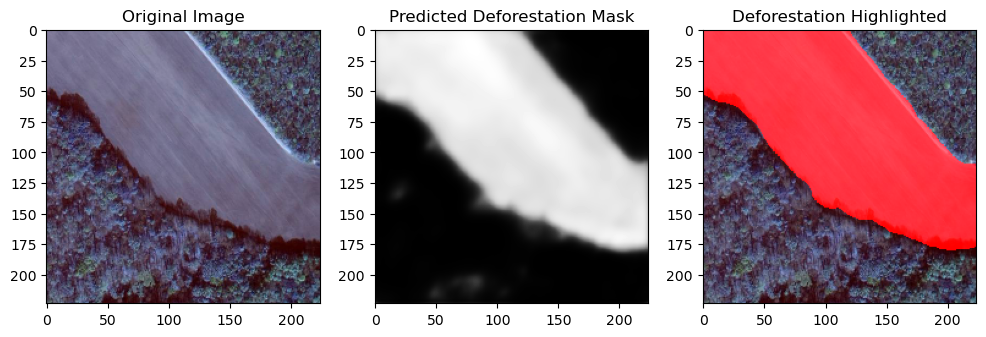

In [21]:
# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(predicted_mask, cmap='gray')
plt.title("Predicted Deforestation Mask")

plt.subplot(1, 3, 3)
plt.imshow(highlighted_image)
plt.title("Deforestation Highlighted")
plt.show()

# Build U-Net model for segmentation to underline the boundary of the deforestation

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.4780 - loss: 0.6869 - val_accuracy: 0.7526 - val_loss: 0.5905
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 103s 6s/step - accuracy: 0.7745 - loss: 0.5818 - val_accuracy: 0.7526 - val_loss: 0.5541
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 102s 6s/step - accuracy: 0.7726 - loss: 0.5333 - val_accuracy: 0.7526 - val_loss: 0.4613
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 103s 6s/step - accuracy: 0.7517 - loss: 0.4450 - val_accuracy: 0.7684 - val_loss: 0.3400
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 102s 6s/step - accuracy: 0.8316 - loss: 0.2911 - val_accuracy: 0.8706 - val_loss: 0.2982
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 102s 6s/step - accuracy: 0.8877 - loss: 0.2869 - val_accuracy: 0.8700 - val_loss: 0.3388
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 103s 6s/step - accuracy: 0.9107 - loss: 0.2523 - val_accuracy: 0.9117 - val_loss: 0.2132
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 103s 6s/step - accuracy: 0.9102 - loss: 0.2255 - val_accuracy: 0.9157 - v

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


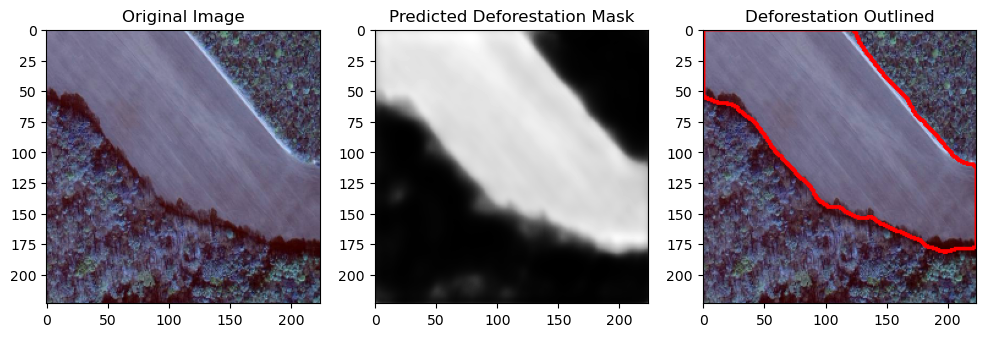

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Paths to your dataset
train_images_path = r"D:\dataset 2\images"  
train_masks_path = r"D:\dataset 2\binary_masks"

# Hyperparameters
input_shape = (224, 224, 3)
batch_size = 16
epochs = 50
learning_rate = 0.0001

def load_images_and_masks(images_path, masks_path):
    images = []
    masks = []
    image_files = sorted(os.listdir(images_path))
    mask_files = sorted(os.listdir(masks_path))

    for img_file, mask_file in zip(image_files, mask_files):
        # Load and resize images and masks
        img = cv2.imread(os.path.join(images_path, img_file))
        img = cv2.resize(img, (input_shape[1], input_shape[0]))
        images.append(img)

        mask = cv2.imread(os.path.join(masks_path, mask_file), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (input_shape[1], input_shape[0]))
        masks.append(mask)

    images = np.array(images) / 255.0  # Normalize images to [0,1]
    masks = np.array(masks) / 255.0  # Normalize masks to [0,1]
    masks = np.expand_dims(masks, axis=-1)  # Add channel dimension for masks
    return images, masks

# Load data
X, y = load_images_and_masks(train_images_path, train_masks_path)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build U-Net model for segmentation
def build_deforestation_detection_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # Encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    
    # Bottleneck
    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(c4)
    
    # Decoder
    u1 = UpSampling2D((2, 2))(c4)
    u1 = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(u1)
    u1 = concatenate([u1, c3])
    u1 = Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    
    u2 = UpSampling2D((2, 2))(u1)
    u2 = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(u2)
    u2 = concatenate([u2, c2])
    u2 = Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    
    u3 = UpSampling2D((2, 2))(u2)
    u3 = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(u3)
    u3 = concatenate([u3, c1])
    u3 = Conv2D(32, (3, 3), activation='relu', padding='same')(u3)
    
    # Segmentation output layer
    output = Conv2D(1, (1, 1), activation='sigmoid')(u3)
    
    model = Model(inputs=inputs, outputs=output)
    return model

# Instantiate and compile model
model = build_deforestation_detection_model(input_shape)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Outline function to draw borders around deforested areas
def outline_deforestation(image, mask, color=(255, 0, 0), thickness=2):
    # Threshold the mask to binary (0 or 1)
    binary_mask = (mask > 0.5).astype(np.uint8)
    # Find contours on the mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw contours on the image
    outlined_image = image.copy()
    cv2.drawContours(outlined_image, contours, -1, color, thickness)
    return outlined_image

# Test on a validation image
test_image = X_val[0]
predicted_mask = model.predict(np.expand_dims(test_image, axis=0))[0, :, :, 0]

# Outline the deforested areas
outlined_image = outline_deforestation(test_image, predicted_mask)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(predicted_mask, cmap='gray')
plt.title("Predicted Deforestation Mask")

plt.subplot(1, 3, 3)
plt.imshow(outlined_image)
plt.title("Deforestation Outlined")
plt.show()


In [3]:
model.save(r"D:\dataset 2\deforestation_models\U-Net model for segmentation to underline the boundary of the deforestation.h5")

# Split Dataset into Training and Validation Folders

In [6]:
import os
import random
from pathlib import Path
import shutil

# Define paths
images_data_dir = "D:/dataset 2/images"  # Path to your single images dataset
train_dir = "D:/dataset 2/train"
val_dir = "D:/dataset 2/val"
val_split = 0.2  # 20% for validation

# Create train and validation directories
Path(train_dir).mkdir(parents=True, exist_ok=True)
Path(val_dir).mkdir(parents=True, exist_ok=True)

# Function to split dataset
def split_dataset_single_dir(images_data_dir, train_dir, val_dir, val_split=0.2, extensions=[".jpg", ".jpeg", ".png"]):
    # Get list of all images with specified extensions
    images = [f for ext in extensions for f in Path(images_data_dir).glob(f'*{ext}')]
    
    if not images:
        print("No images found in the dataset directory.")
        return
    
    # Shuffle images to ensure random distribution
    random.shuffle(images)
    
    # Calculate the split index
    split_idx = int(len(images) * (1 - val_split))
    
    # Split into training and validation sets
    train_images = images[:split_idx]
    val_images = images[split_idx:]
    
    # Copy images to respective directories
    for image_path in train_images:
        shutil.copy(image_path, train_dir)
    for image_path in val_images:
        shutil.copy(image_path, val_dir)
    
    print(f"Copied {len(train_images)} images to {train_dir}")
    print(f"Copied {len(val_images)} images to {val_dir}")

# Run the split function
split_dataset_single_dir(images_data_dir, train_dir, val_dir, val_split)

print("Dataset split into training and validation sets completed.")


Copied 257 images to D:/dataset 2/train
Copied 65 images to D:/dataset 2/val
Dataset split into training and validation sets completed.


# CNN Model for classification

C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 839ms/step - accuracy: 0.6651 - loss: 0.6127 - val_accuracy: 0.7560 - val_loss: 0.4213
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 808ms/step - accuracy: 0.7936 - loss: 0.3677 - val_accuracy: 0.8832 - val_loss: 0.3095
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 819ms/step - accuracy: 0.9196 - loss: 0.2194 - val_accuracy: 0.9080 - val_loss: 0.2255
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 808ms/step - accuracy: 0.9008 - loss: 0.2534 - val_accuracy: 0.9241 - val_loss: 0.1981
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 807ms/step - accuracy: 0.9275 - loss: 0.1956 - val_accuracy: 0.9341 - val_loss: 0.1867
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 808ms/step - accuracy: 0.9369 - loss: 0.1688 - val_accuracy: 0.9330 - val_loss: 0.1791
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 806ms/step - accuracy: 0.9389 - loss: 0.1610 - val_accuracy: 0.9322 - val_loss: 0.2016
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 805ms/step - accuracy: 0.9160 - loss: 0.2119 - val_accu

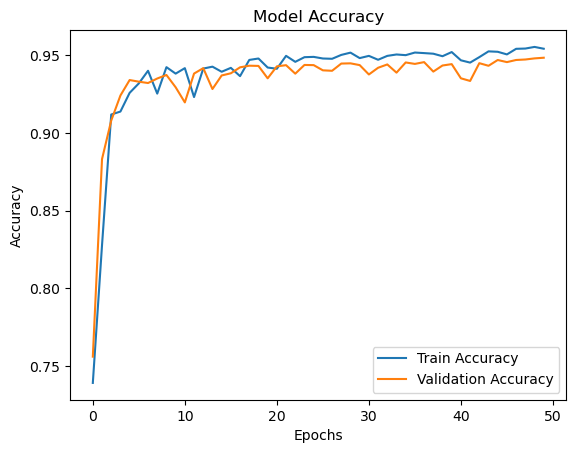

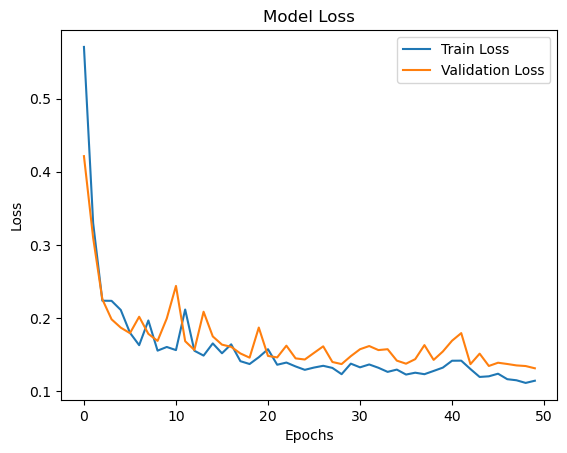

In [11]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam

# Set paths for your dataset
images_path = r"D:\dataset 2\images"
masks_path = r"D:\dataset 2\binary_masks"

# Load images and masks into arrays
def load_data(images_path, masks_path):
    images = []
    masks = []
    
    for filename in os.listdir(images_path):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            img = load_img(os.path.join(images_path, filename), target_size=(224, 224))
            img_array = img_to_array(img) / 255.0  
            images.append(img_array)

            mask = load_img(os.path.join(masks_path, filename), color_mode='grayscale', target_size=(224, 224))
            mask_array = img_to_array(mask) / 255.0  # Normalize the mask
            masks.append(mask_array)

    return np.array(images), np.array(masks)

images, masks = load_data(images_path, masks_path)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Define a simple CNN model for pixel-wise classification
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        UpSampling2D(size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        UpSampling2D(size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        UpSampling2D(size=(2, 2)),
        Conv2D(1, (1, 1), activation='sigmoid', padding='same')  # Output layer for binary classification per pixel
    ])

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

# Visualize the training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
model.save("D:\dataset 2\deforestation_models\simple CNN model for pixel-wise classification.h5")

In [7]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Load the pre-trained VGG16 model (fine-tuned for classification)
model_path = "D:\\dataset 2\\deforestation_models\\vgg16 model for classification fine tunning with full parameter.h5"
model = load_model(model_path)

# Load the image and mask datasets
images_path = "D:\\dataset 2\\images"
masks_path = "D:\\dataset 2\\binary_masks"

# Function to preprocess images and masks
def preprocess_image(image_path, mask_path):
    # Load image and mask
    img = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 224x224 for VGG16 input
    img_resized = cv2.resize(img, (224, 224))

    # Normalize the image
    img_normalized = img_resized / 255.0

    # Expand dimensions for prediction (batch size of 1)
    img_input = np.expand_dims(img_normalized, axis=0)

    # Normalize mask
    mask_resized = cv2.resize(mask, (224, 224))
    mask_input = np.expand_dims(mask_resized, axis=-1) / 255.0

    return img_resized, mask_input, img_input

# Function to predict and visualize the deforested areas
def predict_and_highlight_deforestation(image_path, mask_path):
    # Preprocess the image and mask
    img_resized, mask_input, img_input = preprocess_image(image_path, mask_path)

    # Predict deforestation mask (binary mask)
    pred_mask = model.predict(img_input)

    # Convert prediction back to 2D array and threshold it
    pred_mask = pred_mask.squeeze()
    pred_mask = (pred_mask > 0.5).astype(np.uint8)

    # Calculate the percentage of deforested area
    deforested_area = np.sum(pred_mask == 1)
    total_area = pred_mask.size
    deforestation_percentage = (deforested_area / total_area) * 100

    # Create an overlay for deforested areas
    overlay = img_resized.copy()
    overlay[pred_mask == 1] = [255, 0, 0]  # Red color for deforested areas

    # Display the original image, mask, and overlay
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(mask_input.squeeze(), cmap='gray')
    axes[1].set_title('True Deforested Mask')
    axes[1].axis('off')

    axes[2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[2].set_title(f'Deforested Area Highlighted\n{deforestation_percentage:.2f}%')
    axes[2].axis('off')

    plt.show()

# Example: Loop through images and masks and highlight deforested areas
for image_file in os.listdir(images_path):
    if image_file.endswith(".jpg"):
        # Corresponding mask for the image
        mask_file = image_file.replace(".jpg", ".png")
        
        # Paths for the image and mask
        image_path = os.path.join(images_path, image_file)
        mask_path = os.path.join(masks_path, mask_file)

        # Predict and highlight deforestation for each image
        predict_and_highlight_deforestation(image_path, mask_path)


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define your dataset path
image_path = "D:/dataset 2/images"
mask_path = "D:/dataset 2/binary_masks"

# List all images
import os
images = os.listdir(image_path)
images = [img for img in images if img.endswith('.jpg')]

# Define your model
model = tf.keras.models.load_model("D:/dataset 2/deforestation_models/vgg16 model for classification fine tunning with full parameter.h5")

# Prediction and visualization
def visualize_results(image_file):
    # Load the image and preprocess
    img = load_img(os.path.join(image_path, image_file), target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict using the model
    prediction = model.predict(img_array)

    # Convert the predicted mask to binary
    pred_mask = (prediction[0, :, :, 0] > 0.5).astype(np.uint8)

    # Load the corresponding mask (ground truth)
    mask_file = image_file.replace('.jpg', '.png')  # Assuming mask is PNG
    true_mask = cv2.imread(os.path.join(mask_path, mask_file), cv2.IMREAD_GRAYSCALE)

    # Plot the original image, true mask, and predicted mask
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # True mask (ground truth)
    plt.subplot(1, 3, 2)
    plt.imshow(true_mask, cmap='gray')
    plt.title('True Mask')
    plt.axis('off')

    # Predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask, cmap='Reds')
    plt.title('Predicted Mask')
    plt.axis('off')

    # Show the plot
    plt.show()

# Visualize results for the first image in the dataset
visualize_results(images[0])


IndexError: list index out of range

# Graphical Representation of Validation Loss and Validation Accuracy across all Models


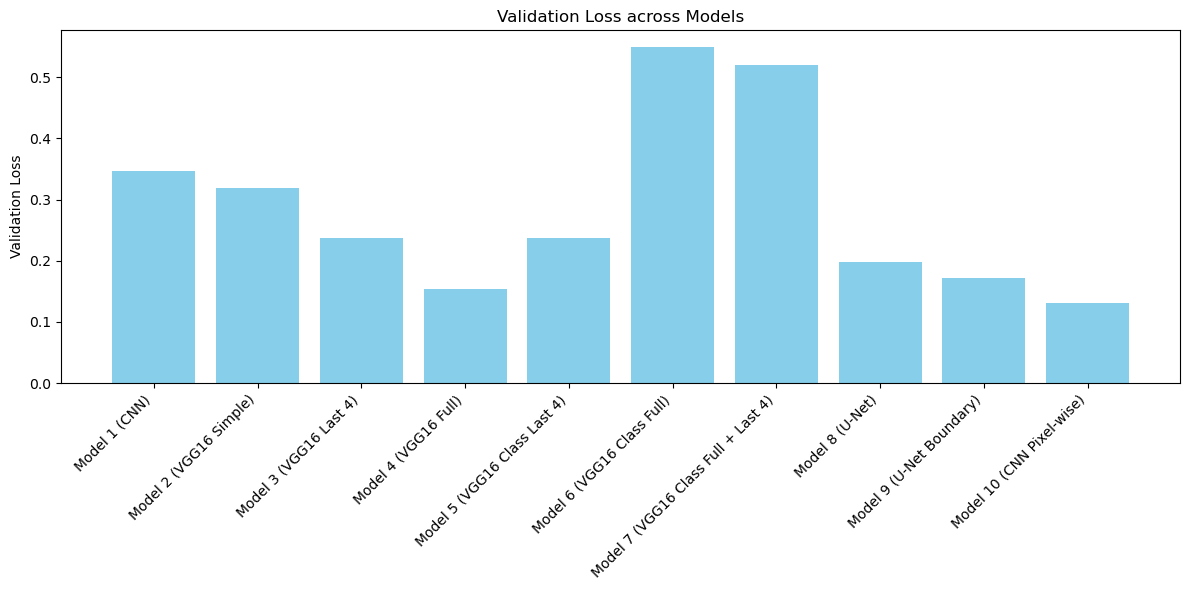

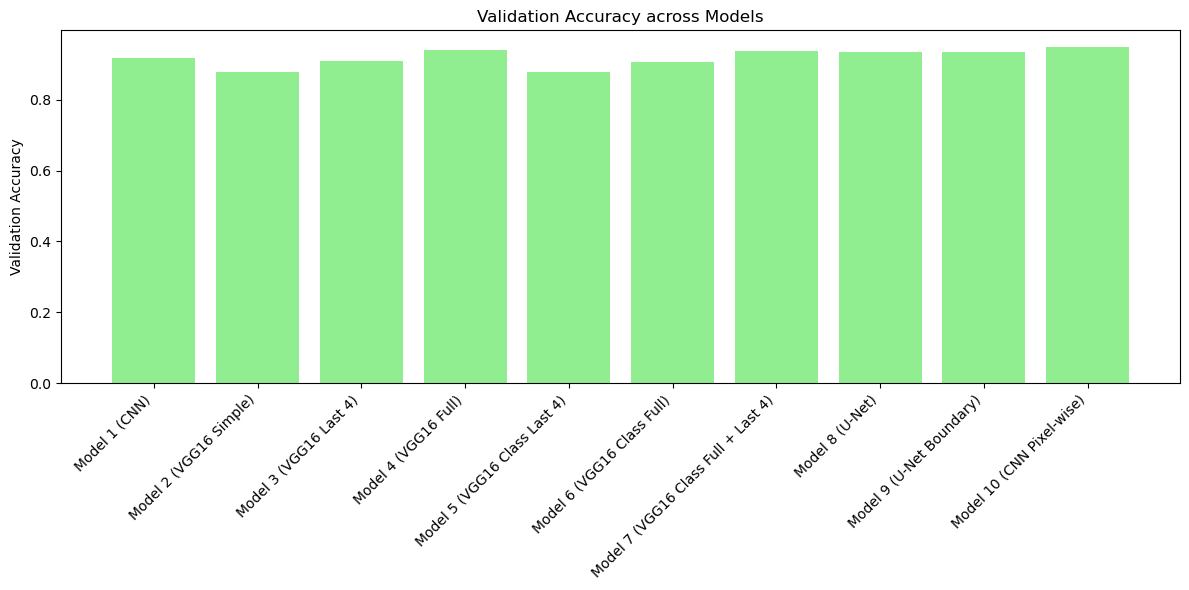

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "Model 1 (CNN)",
    "Model 2 (VGG16 Simple)",
    "Model 3 (VGG16 Last 4)",
    "Model 4 (VGG16 Full)",
    "Model 5 (VGG16 Class Last 4)",
    "Model 6 (VGG16 Class Full)",
    "Model 7 (VGG16 Class Full + Last 4)",
    "Model 8 (U-Net)",
    "Model 9 (U-Net Boundary)",
    "Model 10 (CNN Pixel-wise)"
]

validation_loss = [
    0.3463, 0.3188, 0.2372, 0.1535, 0.2377, 
    0.5494, 0.5201, 0.1988, 0.1723, 0.1311
]

validation_accuracy = [
    0.9174, 0.8786, 0.9086, 0.9396, 0.8769, 
    0.9077, 0.9385, 0.9356, 0.9361, 0.9485
]

# Graph: Validation Loss
plt.figure(figsize=(12, 6))
plt.bar(models, validation_loss, color='skyblue')
plt.title("Validation Loss across Models")
plt.ylabel("Validation Loss")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Graph: Validation Accuracy
plt.figure(figsize=(12, 6))
plt.bar(models, validation_accuracy, color='lightgreen')
plt.title("Validation Accuracy across Models")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
